## Instalação da biblioteca para manipulação da API do twitter

In [1]:
install.packages("rtweet")

package 'rtweet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mbrug\AppData\Local\Temp\RtmpMznnlI\downloaded_packages


## Importar a biblioteca

In [12]:
library(rtweet)
library(maps)

## Definir diretório de trabalho

In [3]:
setwd("C:/Users/mbrug/Desktop/TwitterData")

## Autenticação da API do twitter

In [4]:
token <- create_token(app = "IGTIChallenge", consumer_key = "JYL3GsCttjpDNnDIEEMXcDkie",
                     consumer_secret = "HcdBcbSqKGQUhp5qaNo9xSo15IeZ4qyXtI0pls7qQpk1sdN9we",
                     access_token = "1275047684685148162-JBSg2LMv328OS0CimVuYIYAXlMb34t",
                     access_secret = "YWHPESluSPA3nfvX133XefMAiud6bg56vPMcaRLISm9Iy")

## Parametros de busca (por usuário)

In [5]:
# Setamos qual conta específica queremos coletar dados
screen_name <- "jairbolsonaro"

## Buscando 

In [6]:
# Coleta os dados get_timeline(conta_twitter, numero_tweets, incluir_retweets, excluir_replicações)
tweets <- get_timeline(screen_name, n = 1000, include_rts = TRUE, exclude_replies = TRUE)

Registered S3 method overwritten by 'openssl':
  method      from
  print.bytes Rcpp


## Salvando o vetor de tweets como CSV e apenas o Texto em TXT na codificação do portugues

In [8]:
write_as_csv(tweets, "TweetsByNameRawData.csv", fileEncoding = "latin1//TRANSLIT")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


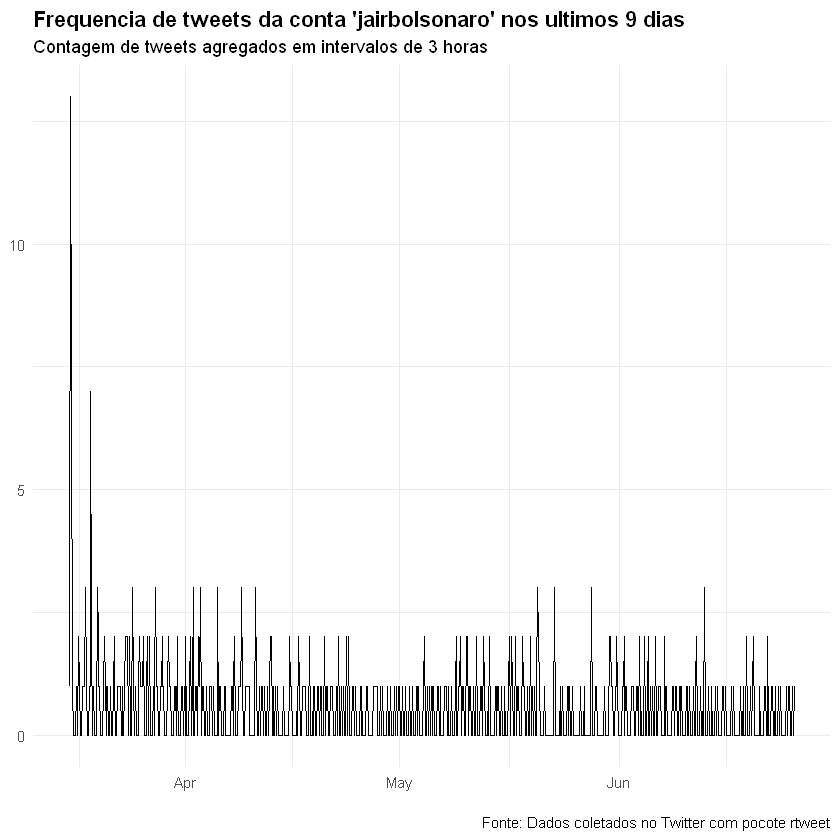

In [9]:
ts_plot(tweets, "3 hours") +
    ggplot2::theme_minimal() +
    ggplot2::theme(plot.title = ggplot2::element_text (face = "bold")) +
    ggplot2::labs (
        x = NULL, y = NULL,
        title = "Frequencia de tweets da conta 'jairbolsonaro' nos ultimos 9 dias",
        subtitle = "Contagem de tweets agregados em intervalos de 3 horas",
        caption = "\nFonte: Dados coletados no Twitter com pocote rtweet"
        )

## Parametros de busca (por hashtags)

In [13]:
search.string <- c("#ficaemcasa OR #coronavirus OR #covid OR #covid-19 or #covid19")
type = "mixed" #"recent" , "mixed" , "popular"

## Buscando

In [14]:
# include_rts (TRUE ou FALSE) - usado para indicar se inclui retweeets ou não na pesquisa
# retryonratelimit (TRUE ou false) - usado para indicar se continua ou não depois do limite de 18000 tweets
# lang - linguagem

tweets <- search_tweets(search.string, n = 18000, lang = "pt", type = type,
                       include_rts = FALSE, retryonratelimit = TRUE)

Warning message in polygon(coord, col = col, ...):
""coll" is not a graphical parameter"

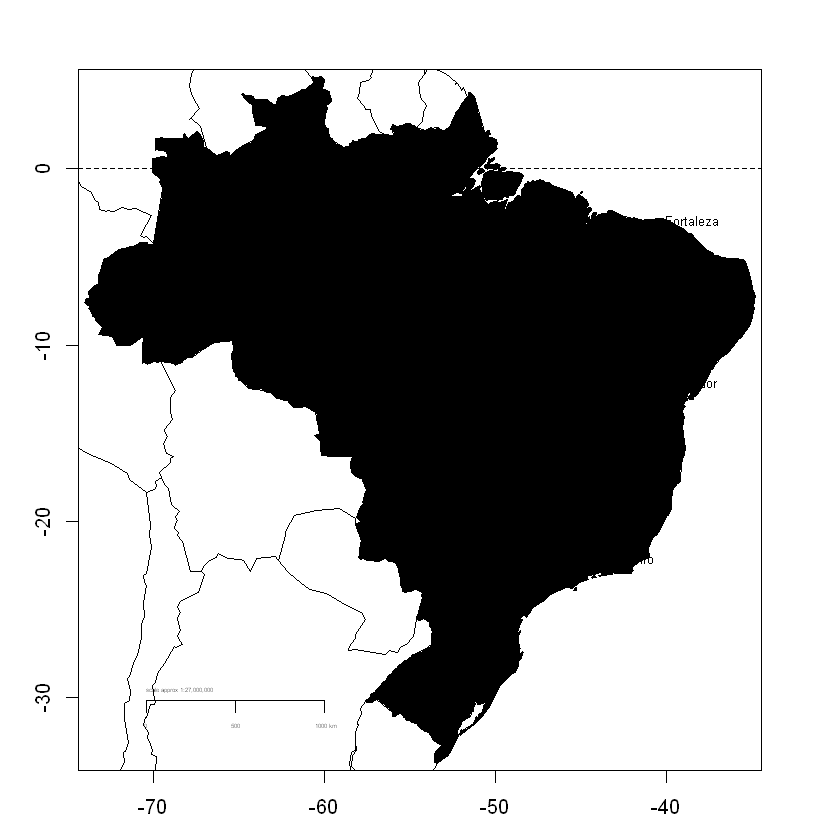

In [25]:
## Salvando o vetor de tweets como CSV e apenas o texto em TXT na codificação do portugues
write_as_csv(tweets, "TweetsRawData.csv", fileEncoding = "latin1//TRANSLIT")
write.table(tweets$text, "TweetsRawData.txt", fileEncoding = "latin1//TRANSLIT")

tweets <- lat_lng(tweets) #Cria lat/lgn variaveis usando todos os tweets disponíveis

# Plota o mapa do brasil
par(mar=c(0,0,0,0)) # Função par define ou ajusta os parametros de plotagem. Parametro mar ajuta as margens
map("world", "brazil", lwd = 0.3, fill=T, coll="grey95")
map(,,add=T)
map.axes()
map.scale(ratio=T, cex=0.3)
abline(h=0, lty=2)
map.cities(country = "Brazil", minpop = 2000000, pch=15, cex=0.9) # pacote maps

# Adiciona os tweets ao mapa
with(tweets, points(lng, lat, pch = 20, cex = .75, col = rgb(0, .3, .7, .75)))